In [1]:
#importation des librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams # Personnaliser les tracés Matplotlib à l'aide de rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier #Importation du modéle Knn 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score

# DATA UNDERSTANDING

In [2]:
#chargement des donnees csv
df = pd.read_csv('dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# head() affiche les 5 premières lignes.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Pour afficher le nombre de lignes (observations) et de colonnes(descripteurs)
df.shape

(7043, 21)

In [5]:
#Cette méthode retourne des informations sur une DataFrame 
#(dtypes d'index et de colonne, les valeurs non nulles et l'utilisation de la mémoire).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


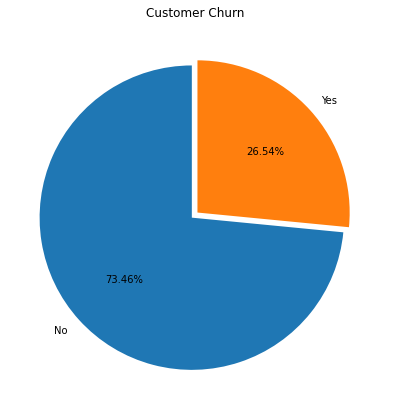

In [6]:
# Data to plot
labels = df['Churn'].value_counts(sort = True).index
sizes = df['Churn'].value_counts(sort = True)
explode = (0.05,0)  # exploser 1ère tranche
rcParams['figure.figsize'] = 7,7
# Plot
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', startangle=90,)
plt.title('Customer Churn ')
#enrigistrement de la figure 
plt.savefig('figure1.png', dpi = 400)
plt.show()


- 73.46 % des clients sont restés dans l'entreprise
- 26.54 % des clients ont quitté l'entreprise

In [7]:
#Afficher les nombres de Males et Females 
df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [8]:
#visualiser l'abonnement et le désabonnement des males
df[df["gender"] == "Male"]["Churn"].value_counts()

No     2625
Yes     930
Name: Churn, dtype: int64

In [9]:
#visualiser l'abonnement et le désabonnement des females
df[df["gender"] == "Female"]["Churn"].value_counts()

No     2549
Yes     939
Name: Churn, dtype: int64

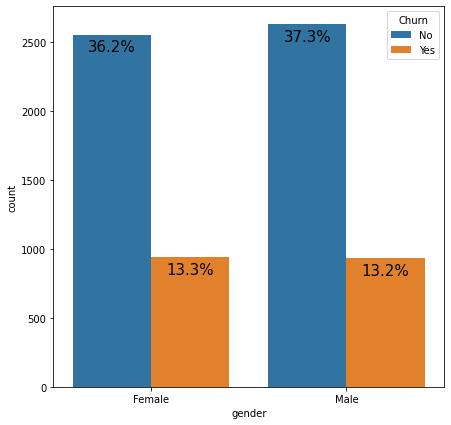

In [10]:
#représentation graphique des clients en fonction de leurs gender avec la bibliotheque seaborn
splot=sns.countplot(x="gender",hue="Churn",data=df);
#affichage des poucentages sur la figure
for p in splot.patches: #parcourir les bâtons 
    splot.annotate('{:.1f}%'.format(p.get_height()/df.shape[0]*100), #cacule des pourcentages
                   (p.get_x() + p.get_width() / 2., p.get_height()), #Position
                   #saisir les parametres 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
#enrigistrement de la figure 
splot.figure.savefig('figure2.png', dpi = 400)
 

In [11]:
#Nous pouvons  compter les éléments uniques avec .nunique() 
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# Data cleaning

In [12]:
#Découvrir les cases vides de la colonne TotalCharges
df.query("TotalCharges == ' '").TotalCharges.count()

11

In [13]:
#Remplacer les 11 espaces de valeurs manquantes par nan
df["TotalCharges"] = df["TotalCharges"].replace(' ',np.nan)

In [14]:
#affiche les nombre de lignes avant la suppresion des valeurs manquantes
df.shape[0]

7043

In [15]:
#Supprimer les valeurs manquantes 
df.dropna(inplace = True);

In [16]:
#affiche les nombre de lignes après la suppresion des valeurs manquantes
df.shape[0]

7032

In [17]:
#Changer le type de la variable TotalCharges
df.TotalCharges=df.TotalCharges.astype('float64') 

In [18]:
#afficher le type de la variable TotalCharges
df.TotalCharges.dtypes

dtype('float64')

In [19]:
#Consulter les valeurs négatives de la variable TotalCharges
df[df["TotalCharges"]<0]["TotalCharges"].count()
#aucune valeur négative

0

In [20]:
#Selection des variables catégorielles
Categorial_columns = [col for col in df.columns if col not in ("customerID","MonthlyCharges","TotalCharges","tenure","Churn")]

In [21]:
#Afficher les modalités de chaques varaibles
for col in Categorial_columns:
    print("{} : {}".format(col,df[col].unique()))

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [22]:
#Pour éviter la redondances il faut considerer "No internet service"  comme "no"
for col in Categorial_columns:
    if col in ("OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"):
        df[col] = df[col].replace({'No internet service':'No'})

In [23]:
#Afficher la valeur Minimale et la valeur Maximale de la varaible tenure
temp_tenure = np.array(df["tenure"].tolist())
print("min: {}".format(temp_tenure.min()))
print("max: {}".format(temp_tenure.max()))

min: 1
max: 72


/home/ayadi/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


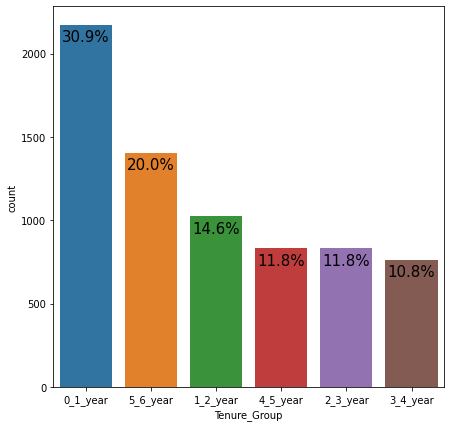

In [24]:
#Diviser la varaible Tenure en groupes  
def tenure_to_group(df):
    if df["tenure"] <=12: # represente entre 0 et 12 moins 
        return "0_1_year"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ): # represente entre 1 et 2 ans 
        return "1_2_year"
    elif (df["tenure"] > 24) & (df["tenure"] <= 36) : # represente entre 2 et 3 ans
        return "2_3_year"
    elif (df["tenure"] > 36) & (df["tenure"] <= 48) : # represente entre 3 et 4 ans
        return "3_4_year"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60): # represente entre 4 et 5 ans
        return "4_5_year"
    elif (df["tenure"] > 60) & (df["tenure"] <= 72): # represente entre 5 et 6 ans
        return "5_6_year"
df["Tenure_Group"] = df.apply(lambda df:tenure_to_group(df),axis = 1) # ajouter dans la dataframe

#représentation graphique des Tenure Group avec la bibliotheque seaborn
splot=sns.countplot(df["Tenure_Group"],order = df["Tenure_Group"].value_counts().index); 

for p in splot.patches: #parcourir les bâtons 
    splot.annotate('{:.1f}%'.format(p.get_height()/df.shape[0]*100), #cacule des pourcentages
                   (p.get_x() + p.get_width() / 2., p.get_height()), #Position
                   #saisir les parametres 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
#enrigistrement de la figure 
splot.figure.savefig('figure3.png', dpi = 400)


- On constate que la majorité des clients apprtient au groupe de 12 moins (30.9%)
- 20% des clients ont une valuer de Tenure groupe entre 5 et 6 ans 

/home/ayadi/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


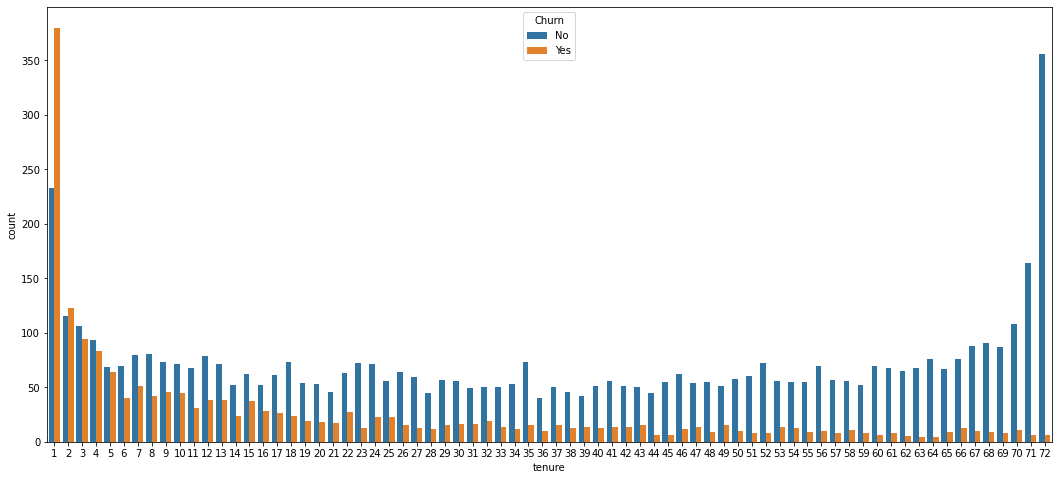

In [25]:
#Fixer la taille du la figure
f, axes = plt.subplots(figsize=(18, 8))
#représentation graphique de la variable Tenure en fonction da la varaible "Churn"  avec la bibliotheque seaborn
sns.countplot(df["tenure"],hue = df["Churn"]);
#enrigistrement de la figure 
plt.savefig('figure4.png', dpi = 400)

- On constate d'après la figure suivante que la possiblité que le client quitte est élevée pour les valeurs de tenure moins importantes alors que la possibilité que le client reste est élevée pour les valeurs de tenures plus importantes.

/home/ayadi/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ayadi/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ayadi/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ayadi/a

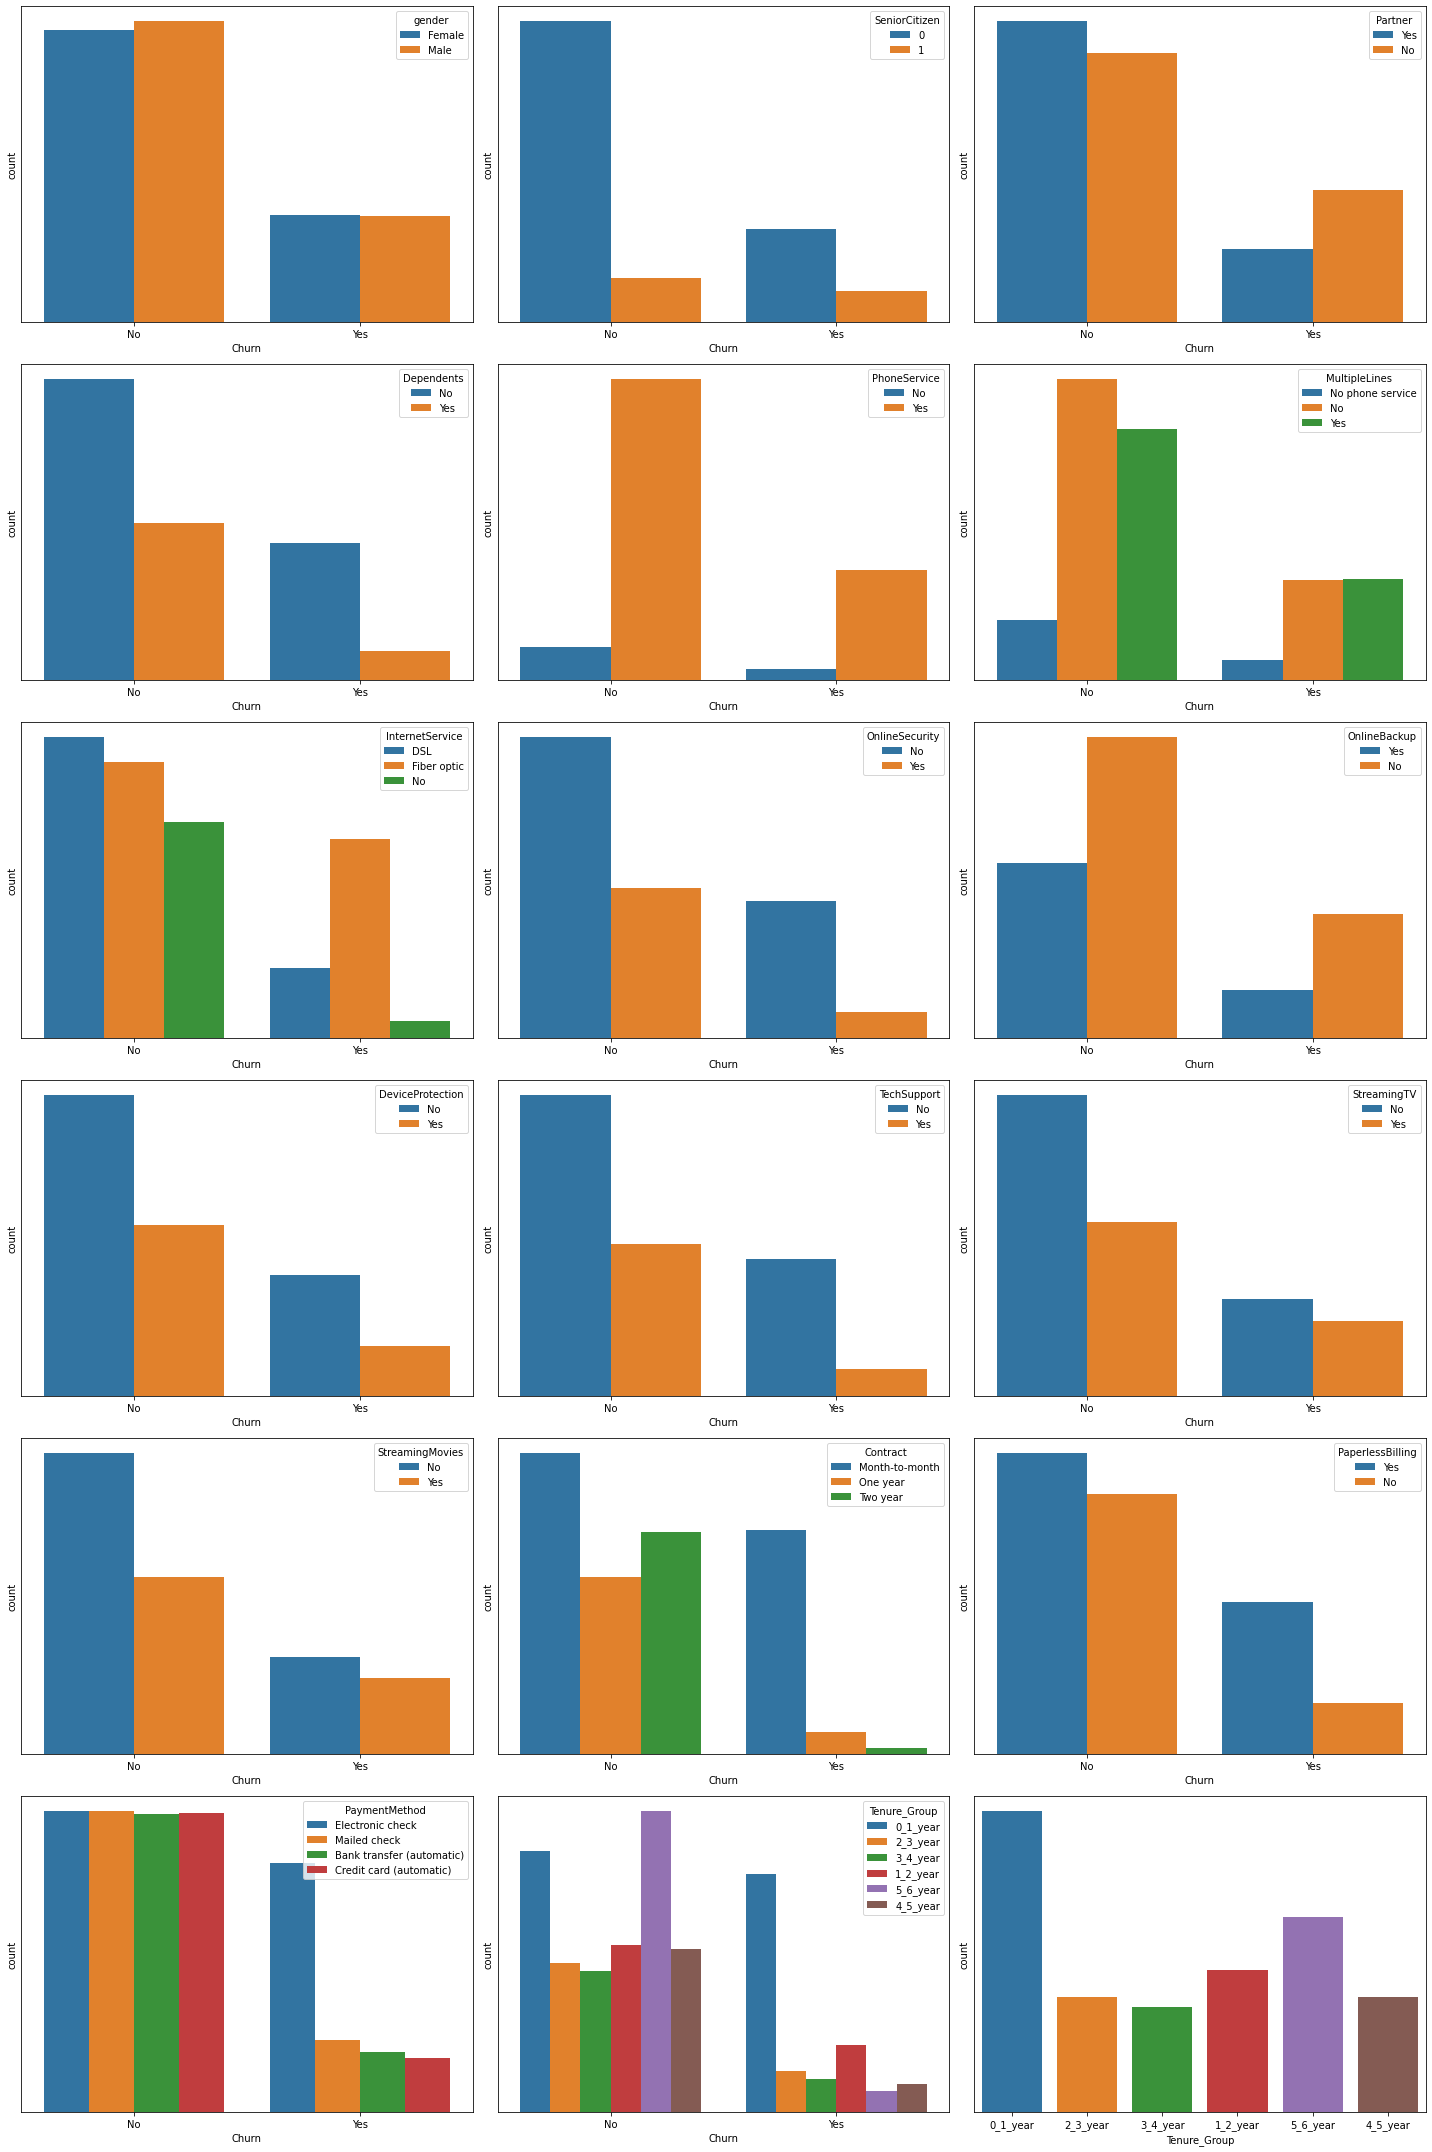

In [26]:
#Fixer la taille du la figure
f, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))

sns.countplot(df["Churn"],hue = df["gender"],ax = axes[0,0])
sns.countplot(df["Churn"],hue = df["SeniorCitizen"],ax = axes[0,1])
sns.countplot(df["Churn"],hue = df["Partner"],ax = axes[0,2])
sns.countplot(df["Churn"],hue = df["Dependents"],ax = axes[1,0])
sns.countplot(df["Churn"],hue = df["PhoneService"],ax = axes[1,1])
sns.countplot(df["Churn"],hue = df["MultipleLines"],ax = axes[1,2])
sns.countplot(df["Churn"],hue = df["InternetService"],ax = axes[2,0])
sns.countplot(df["Churn"],hue = df["OnlineSecurity"],ax = axes[2,1])
sns.countplot(df["Churn"],hue = df["OnlineBackup"],ax = axes[2,2])
sns.countplot(df["Churn"],hue = df["DeviceProtection"],ax = axes[3,0])
sns.countplot(df["Churn"],hue = df["TechSupport"],ax = axes[3,1])
sns.countplot(df["Churn"],hue = df["StreamingTV"],ax = axes[3,2])
sns.countplot(df["Churn"],hue = df["StreamingMovies"],ax = axes[4,0])
sns.countplot(df["Churn"],hue = df["Contract"],ax = axes[4,1])
sns.countplot(df["Churn"],hue = df["PaperlessBilling"],ax = axes[4,2])
sns.countplot(df["Churn"],hue = df["PaymentMethod"],ax = axes[5,0])
sns.countplot(df["Churn"],hue = df["Tenure_Group"],ax = axes[5,1])
sns.countplot(df["Tenure_Group"],ax = axes[5,2]);

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.savefig('figure5.png', dpi = 400)


- à partir de la figure, nous pouvons voir comment des différents facteurs affectent la décision des clients de rester ou de quitter l'entreprise

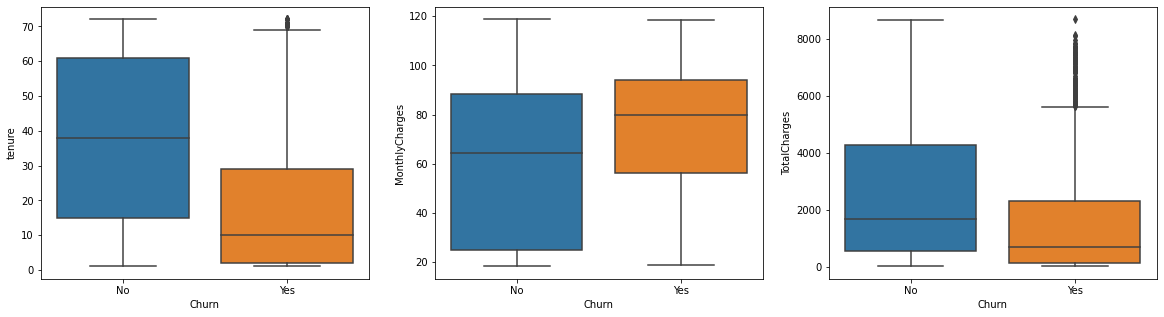

In [27]:
#Fixer la taille et le nombre du  la figure
f, axes = plt.subplots( ncols=3, figsize=(20, 5))
sns.boxplot(x="Churn", y="tenure", data=df,ax = axes[0]);
sns.boxplot(x="Churn", y="MonthlyCharges", data=df,ax = axes[1])
sns.boxplot(x="Churn", y="TotalCharges", data=df,ax = axes[2]);
plt.savefig('figure6.png', dpi = 400)


- Les boîtes à moustaches sont utiles car elles fournissent un résumé visuel des données permettant aux chercheurs d'identifier rapidement les valeurs moyennes, la dispersion de l'ensemble de données et les signes d'asymétrie.
- On constate l'appration des points abérantes (outliers) pour les variables tenure et totalcharges 


In [28]:
#ordonner les tenures groups selon la période 
order1=['0_1_year', '1_2_year', '2_3_year', '3_4_year', '4_5_year','5_6_year']
order1

['0_1_year', '1_2_year', '2_3_year', '3_4_year', '4_5_year', '5_6_year']

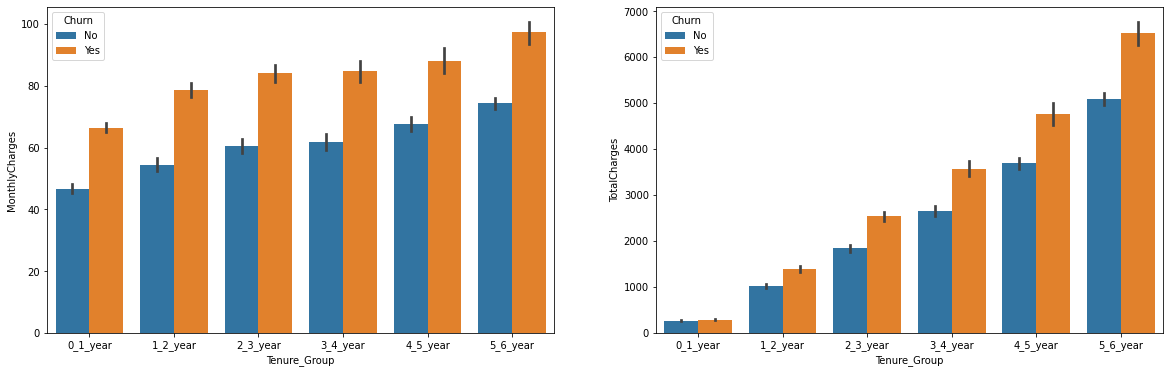

In [29]:
f, axes = plt.subplots( ncols=2, figsize=(20, 6))
#représentation graphique de la variable Tenure_Group en fonction da la varaible "MonthlyCharges" 
sns.barplot(x='Tenure_Group',y='MonthlyCharges',data=df,hue = "Churn",ax = axes[0],order=order1)
#représentation graphique de la variable Tenure_Group en fonction da la varaible "TotalCharges" 
sns.barplot(x='Tenure_Group',y='TotalCharges',data=df,hue = "Churn",ax = axes[1],order=order1);
#enrigistrement de la figure 
plt.savefig('figure7.png', dpi = 400)

- On distingue que losrque la periode augmente les dépenses augmentent aussi 

/home/ayadi/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ayadi/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ayadi/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

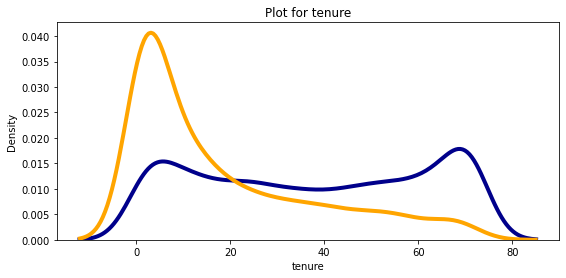

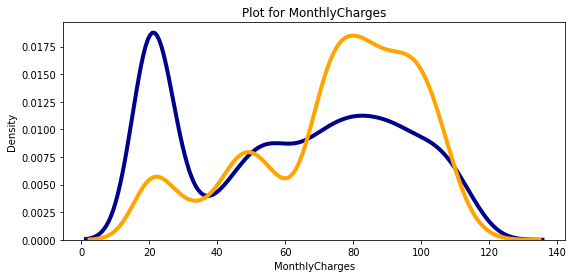

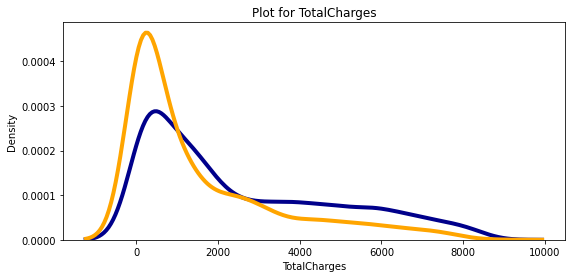

In [30]:
def kdeplot(feature, hist, kde):
    plt.figure(figsize=(9, 4))
    plt.title("Plot for {}".format(feature))
    ax0 = sns.distplot(df[df['Churn'] == 'No'][feature].dropna(), hist=hist, kde=kde, 
             color = 'darkblue',  label= 'Churn: No',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    ax1 = sns.distplot(df[df['Churn'] == 'Yes'][feature].dropna(), hist=hist, kde=kde, 
             color = 'orange',  label= 'Churn: Yes',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
kdeplot('tenure', hist = False, kde = True)
plt.savefig('figure12.png', dpi = 400)
kdeplot('MonthlyCharges', hist = False, kde = True)
plt.savefig('figure13.png', dpi = 400)
kdeplot('TotalCharges', hist = False, kde = True)
plt.savefig('figure14.png', dpi = 400)

  À partir des graphiques ci-dessus, nous pouvons conclure que:
- Les utilisateurs récents sont plus susceptibles de quitter .
- Les utilisateurs avec des charges mensuelles plus élevées sont également plus susceptibles de quitter .
- TotalCharges a une propriété similaire pour les deux .

### Data preprocessing

In [31]:
#Supprimer la colonne "customerID" de la table (non nécessaire pour la prédection)
df = df.drop(columns = ['customerID'])

In [32]:
#Partition de la dataframe en variables catégorielle et variables numériques
cat_cols = [x for x in df.columns if df[x].nunique()<=6 and x!="Churn"]
num_cols = [x for x in df.columns if df[x].nunique()>6 and x!="customerID"]

In [33]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Tenure_Group']

In [34]:
#Mettre les variables numériques dans une dataframe
Num_features= pd.DataFrame(data = df[num_cols])
Num_features.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [35]:
#Importaion du StandardScaler
#instanciation de l'objet
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(Num_features)
print(Z)

[[-1.28024804 -1.16169394 -0.99419409]
 [ 0.06430269 -0.26087792 -0.17373982]
 [-1.23950408 -0.36392329 -0.95964911]
 ...
 [-0.87280842 -1.17000405 -0.85451414]
 [-1.15801615  0.31916782 -0.87209546]
 [ 1.36810945  1.35793167  2.01234407]]


In [36]:
# Transformation de Z vers une dataframe
Z_centre_df = pd.DataFrame(data = Z, columns=["tenure","MonthlyCharges","TotalCharges"], index=Num_features.index)

In [37]:
#affiche les 5 premières lignes.
Z_centre_df.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457


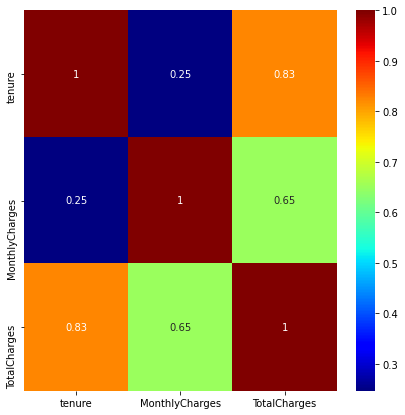

In [38]:
#Afficher la matrice du corrélation entre les varaibles numériques
splot=sns.heatmap(Z_centre_df.corr(),annot=True,cmap='jet');
#enrigistrement de la figure 
splot.figure.savefig('figure8.png', dpi = 400)

- D’aprés la matrice du corrélation on constate une forte corrélation entre les variables "Tenure" et “Totalcharges” donc pour éviter la redendance, on a supprimé la variable Tenure 

In [39]:
#Suppression de la colonne Tenure
Z_centre_df.drop("tenure",inplace = True, axis = 1)

In [40]:
#Suppression des colonnes "MonthlyCharges","TotalCharges","tenure" du la dataframe
df.drop(["MonthlyCharges","TotalCharges","tenure"],axis = 1, inplace = True)
#Ajouter les nouveaux varaibles centrées réduites au dataframe
df = pd.concat([df, Z_centre_df], axis=1)

In [41]:
#affciher la nouvelle dataframe
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Tenure_Group,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0_1_year,-1.161694,-0.994194
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,2_3_year,-0.260878,-0.173740
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0_1_year,-0.363923,-0.959649
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,3_4_year,-0.747850,-0.195248
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,0_1_year,0.196178,-0.940457


In [42]:
# Encodage de la variable Churn  
# On va utiliser un LabelEncoder 
#instanciation de l'objet
le = LabelEncoder()
Churn_encode = le.fit_transform(df["Churn"])

In [43]:
# Churn_encode est de type numpy array
# Transformation vers une dataframe
Churn_encode = pd.DataFrame(data = Churn_encode, columns=["Churn"], index=df.index)

In [44]:
#Suppression de la variable cible non encodé
df = df.drop(columns = ['Churn'])

In [45]:
#concaténation de la varaible churn encodé et la data frame 
df_encoded = pd.concat([df,Churn_encode] , axis = 1)

In [46]:
#Filtrer les varaible catégorielles
df_categorical = df_encoded[cat_cols].copy()
#Encodage des varaibles catégorielles avec factorize si on a deux modalités ou get_dummies  pour plus que deux
for col in cat_cols:
    if df_encoded[col].nunique() == 2:
        df_encoded[col], _ = pd.factorize(df_encoded[col])
    else:
        df_encoded = pd.get_dummies(df_encoded, columns=[col],drop_first=True)

In [47]:
#Suppression de la variable cible 
df_encoded = df_encoded.drop(columns = ['Churn'])

In [48]:
#concaténation de la varaible churn et la data frame 
df_encoded = pd.concat([df_encoded,Churn_encode] , axis = 1)

In [49]:
#affichier la dataframe encodée
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_1_2_year,Tenure_Group_2_3_year,Tenure_Group_3_4_year,Tenure_Group_4_5_year,Tenure_Group_5_6_year,Churn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,1,0,1,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,1,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [50]:
#Partition de la dataframe en une variable à expliquer et des variable explicatives
X= df_encoded.iloc[:,0:28]
y= df_encoded.iloc[:,28]

In [51]:
#Diviser les données (70% Apprentissage et 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

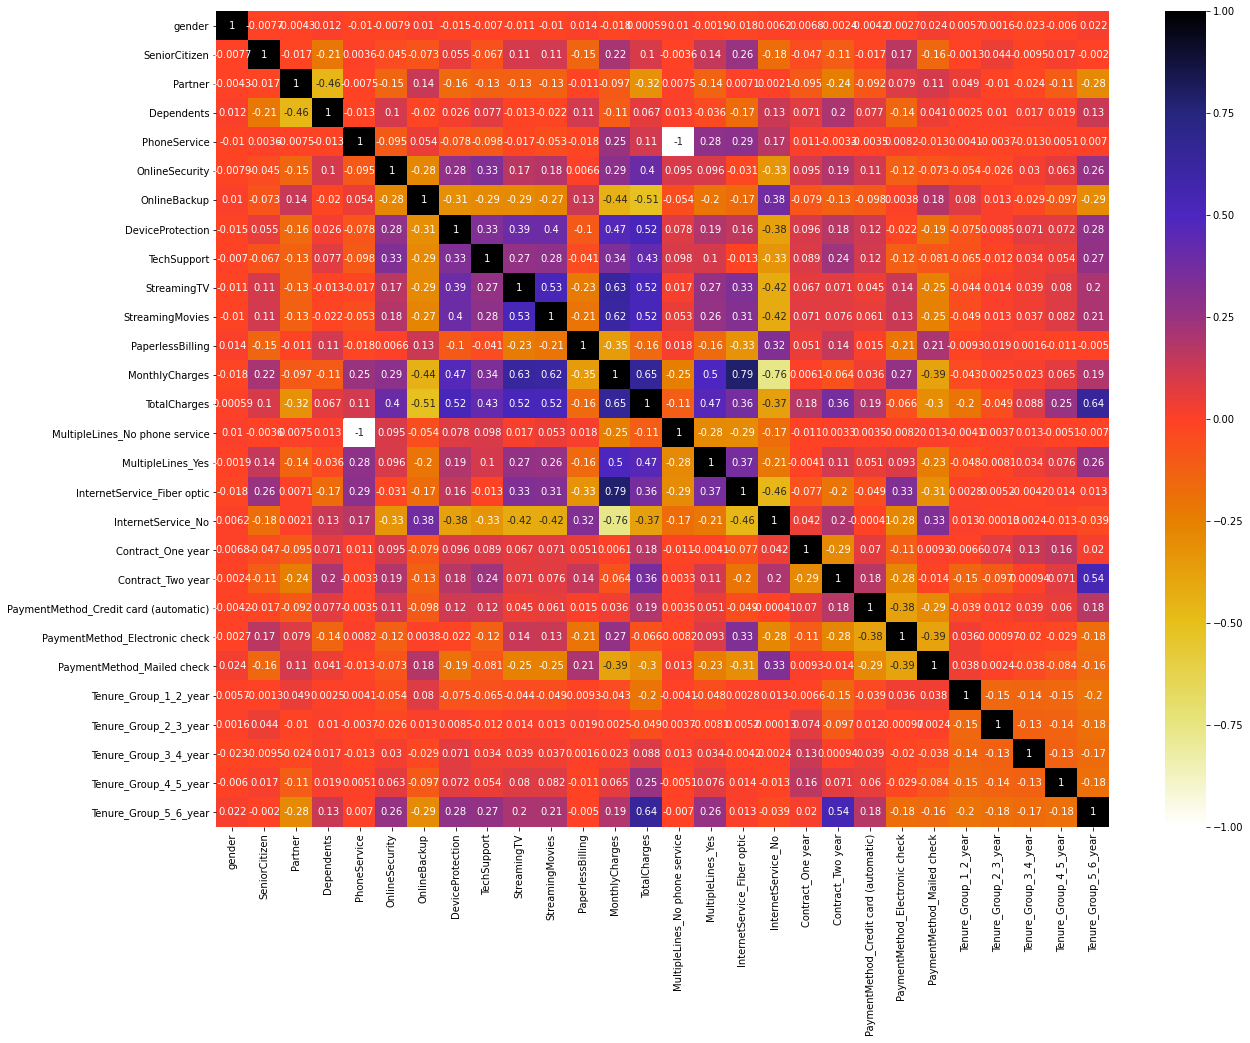

In [52]:
#Utilisation du  "Pearson Correlation"
plt.figure(figsize=(20,15)) #fixer la taille du figure
cor = X_train.corr() #caculer la corrélation
splot=sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r) # matrice du corrélation
#Affichier la figure
plt.show()
#Enrigistrement de la figure 
splot.figure.savefig('figure9.png', dpi = 500)

 - On  constate une forte corrélation entre les variables "MultipleLines_No phone service" et “PhoneService” donc pour éviter la redendance, on doit supprimé l'une des variables 

In [53]:

# Avec la fonction suivante, nous pouvons sélectionner des variables fortement corrélées
# il supprimera la première variable qui est corrélée avec toute autre variable
def correlation(dataset, threshold):
    col_corr = set()  # Set de tous les noms de colonnes corrélées
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # nous nous intéressons à la valeur absolue du coeff
                colname = corr_matrix.columns[i]  # obtenir le nom de la colonne
                col_corr.add(colname)
    return col_corr

In [54]:
#Voir les variables fortement corrélées qui dépassent abs(0.8) 
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

1

In [55]:
#Afficher les variables à éliminer
corr_features

{'MultipleLines_No phone service'}

In [56]:
#suppression des variables fortement corrélées
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

# k-nearest neighbors algorithm

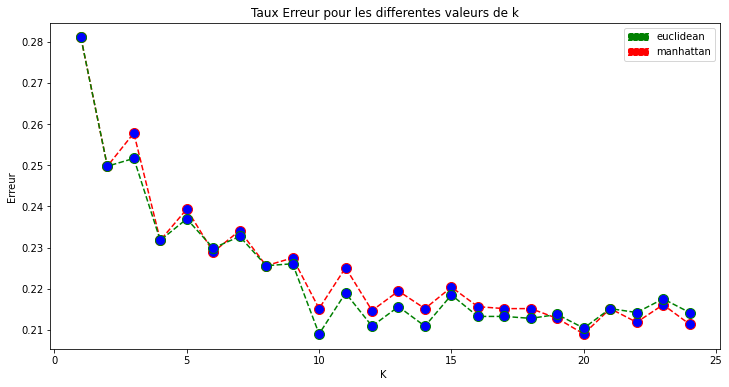

In [58]:
error = []
error1 = []
# Calculer l'erreur pour k entre 1 et 25 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
# Tester k de 1 à 25 et la distance Manhattan ,euclidean
for i in range(1, 25):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
     
    knn1 = KNeighborsClassifier(i,metric='euclidean')
    knn_model1 = knn1.fit(X_train, y_train)
    pred_i1 = knn_model1.predict(X_test)
    error1.append(np.mean(pred_i1 != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 25), error1, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

red_patch = mpatches.Patch(color='red',linestyle='dashed',label='manhattan')
green_patch = mpatches.Patch(color='green',linestyle='dashed', label='euclidean')

plt.legend(handles=[green_patch,red_patch])

plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')
plt.savefig('figureEreur.png', dpi = 400)

- D'apres la figure On constate que la meilleur valeur pour k est 20 avec la métrique de "manhattan"

In [59]:
knn = KNeighborsClassifier(20,metric='manhattan')
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [87]:
print('Accuracy of K-NN classifier on training set: {:.4f}'
     .format(knn_model.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.4f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.8119
Accuracy of K-NN classifier on test set: 0.7910


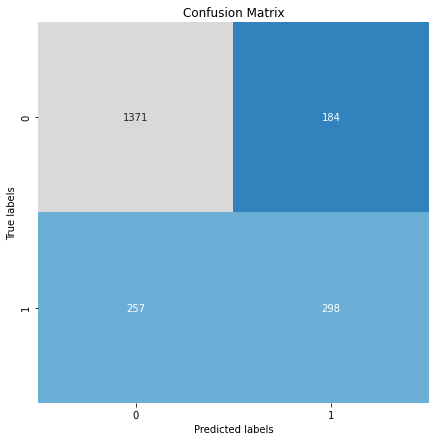

In [61]:
conf_mtx = confusion_matrix(y_test,y_pred_knn,labels=[0,1])
sns.heatmap(conf_mtx,annot=True,cmap='tab20c',cbar = False,fmt = "g")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix');
plt.savefig('figure10.png', dpi = 400)

In [62]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1555
           1       0.62      0.54      0.57       555

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



# Random forest

In [103]:

#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_clf=clf.predict(X_test)

In [104]:

print('Accuracy of RandomForest classifier on training set: {:.4f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.4f}'
     .format(clf.score(X_test, y_test)))



Accuracy of RandomForest classifier on training set: 0.9984
Accuracy of RandomForest classifier on test set: 0.7886


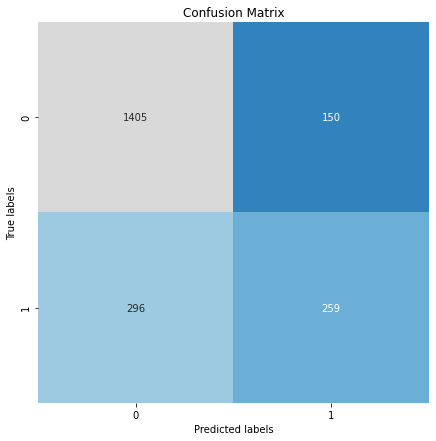

In [106]:
conf_mtx = confusion_matrix(y_test,y_pred_clf,labels=[0,1])
sns.heatmap(conf_mtx,annot=True,cmap='tab20c',cbar = False,fmt = "g")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix');
plt.savefig('figure11.png', dpi = 400)

In [107]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1555
           1       0.63      0.47      0.54       555

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



# Logistic Regression

In [108]:
LR = LogisticRegression()

# fit the model with data
LR.fit(X_train,y_train)
y_pred_lr=LR.predict(X_test)

#lr_acc = metrics.accuracy_score(y_test, y_pred)
#print("Accuracy: ",lr_acc)

In [109]:
print('Accuracy of LogisticRegression classifier on training set: {:.4f}'
     .format(LR.score(X_train, y_train)))
print('Accuracy of LogisticRegression classifier on test set: {:.4f}'
     .format(LR.score(X_test, y_test)))

Accuracy of LogisticRegression classifier on training set: 0.8058
Accuracy of LogisticRegression classifier on test set: 0.7995


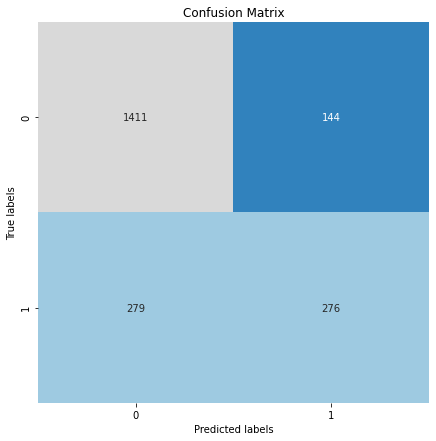

In [111]:
conf_mtx = confusion_matrix(y_test,y_pred_lr,labels=[0,1])
sns.heatmap(conf_mtx,annot=True,cmap='tab20c',cbar = False,fmt = "g")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix');

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1555
           1       0.66      0.50      0.57       555

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



# Support vector machine (SVM)

In [113]:
# Kernel rbf (Par défaut)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


In [114]:
print('Accuracy of Support vector machine (SVM) on training set: {:.4f}'.format(svm.score(X_train, y_train)))
print('Accuracy of Support vector machine (SVM) on test set: {:.4f}'.format(svm.score(X_test, y_test)))

Accuracy of LogisticRegression classifier on training set: 0.8176
Accuracy of LogisticRegression classifier on test set: 0.7976


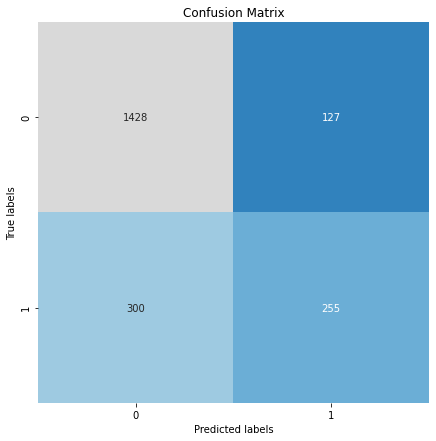

In [115]:
conf_mtx = confusion_matrix(y_test,y_pred,labels=[0,1])
sns.heatmap(conf_mtx,annot=True,cmap='tab20c',cbar = False,fmt = "g")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix');
plt.savefig('figure11.png', dpi = 400)

In [116]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1728
           1       0.46      0.67      0.54       382

    accuracy                           0.80      2110
   macro avg       0.69      0.75      0.71      2110
weighted avg       0.84      0.80      0.81      2110



In [133]:
# On va afficher un tableau qui ordonne les modèles du plus performant au moins performant suivant le score
s1=accuracy_score(y_test, y_pred_knn)
s2=accuracy_score(y_test, y_pred_clf)
s3=accuracy_score(y_test, y_pred_lr)
s4=accuracy_score(y_test, y_pred_svm)

models = pd.DataFrame({
    'Model': ['k-nearest neighbors (KNN) ', 'Random forest','Logistic Regression',
              'Support vector machine (SVM)'],
    'Score': [s1,s2, s3, 
              s4]})
models.sort_values(by="Score",ascending=False)

,Model,Score
2,Logistic Regression,0.799526
3,Support vector machine (SVM),0.797630
0,k-nearest neighbors (KNN),0.790995
1,Random forest,0.788626


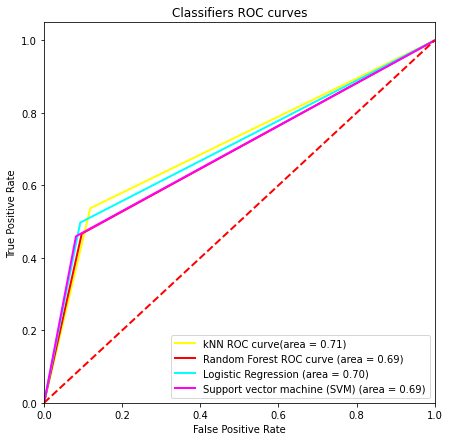

In [135]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_knn) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_clf) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_lr)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_svm) 
roc_auc4 = auc(fpr4, tpr4)
plt.figure(figsize=(7,7)) 
plt.plot(fpr1, tpr1, color='yellow', lw=2, label='kNN ROC curve(area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='cyan', lw=2, label='Logistic Regression (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='magenta', lw=2, label='Support vector machine (SVM) (area = %0.2f)'% roc_auc4)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()